In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import sklearn as sk
import numpy as np
import os
import random

# SEED all random generators
seed = 4
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
linestyle_tuple = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple2 = [
#      ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
greyscale = ['silver', 'grey', 'lightgrey', 'black']
# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [2]:
df = pd.read_csv('../../../resources/intention/explain_time.csv')
df

,cardinality,executionplan,query_bytes,query_characters,query_cost,query_rows,time_model,time_query
0,18492,Plan hash value: 1148224997\n\n---------------...,852000.0,385.0,563.0,26458.0,1571,110
1,36,Plan hash value: 165028050\n\n----------------...,2244.0,397.0,147.0,51.0,1564,45
2,323,Plan hash value: 1148224997\n\n---------------...,21170.0,265.0,138.0,730.0,1859,41
3,540,Plan hash value: 165028050\n\n----------------...,37436.0,403.0,147.0,764.0,1623,55
4,1224,Plan hash value: 165028050\n\n----------------...,83088.0,412.0,147.0,1731.0,1789,60
5,12113,Plan hash value: 251198219\n\n----------------...,672000.0,400.0,674.0,10278.0,1574,58
6,16949,Plan hash value: 1148224997\n\n---------------...,2883000.0,395.0,928.0,86835.0,1604,75
7,20525,Plan hash value: 1148224997\n\n---------------...,2883000.0,392.0,928.0,86835.0,1660,89
8,77832,Plan hash value: 1148224997\n\n---------------...,2798000.0,382.0,911.0,86835.0,1682,73
9,86832,Plan hash value: 1148224997\n\n---------------...,3222000.0,509.0,994.0,86835.0,1646,100


In [3]:
gdf = df.groupby(by=["cardinality"])[["time_model", "time_query", "query_characters"]].median().reset_index()
gdf["time_query"] = (gdf["time_query"] / 1000).apply(lambda x: round(x, 2))
gdf["time_model"] = (gdf["time_model"] / 1000 - 1).apply(lambda x: round(x, 2))
gdf["query_characters"] = gdf["query_characters"].apply(lambda x: int(x))
gdf["Time total"] = gdf["time_model"] + gdf["time_query"]
gdf = gdf.rename({"cardinality": "$|C|$", "time_query": "Time query", "time_model": "Time model", "query_characters": "Query characters"}, axis=1)
gdf = gdf.reindex(sorted(gdf.columns), axis=1)
gdf

,$|C|$,Query characters,Time model,Time query,Time total
0,36,397,0.56,0.04,0.60
1,323,265,0.56,0.04,0.60
2,540,403,0.60,0.05,0.65
3,1224,412,0.68,0.06,0.74
4,12113,400,0.55,0.05,0.60
5,16949,395,0.59,0.07,0.66
6,18492,385,0.61,0.06,0.67
7,20525,392,0.61,0.07,0.68
8,77832,382,0.67,0.08,0.75
9,86832,509,0.66,0.09,0.75


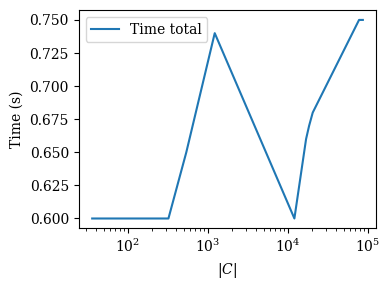

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
gdf.plot(x='$|C|$', y='Time total', ax=ax)
ax.set_xscale('log')
ax.set_ylabel('Time (s)')
ax.set_xlabel('$|C|$')
fig.tight_layout()

In [5]:
print(gdf.to_latex(index=False, escape=False))

\begin{tabular}{rrrrr}
\toprule
 $|C|$ &  Query characters &  Time model &  Time query &  Time total \\
\midrule
    36 &               397 &        0.56 &        0.04 &        0.60 \\
   323 &               265 &        0.56 &        0.04 &        0.60 \\
   540 &               403 &        0.60 &        0.05 &        0.65 \\
  1224 &               412 &        0.68 &        0.06 &        0.74 \\
 12113 &               400 &        0.55 &        0.05 &        0.60 \\
 16949 &               395 &        0.59 &        0.07 &        0.66 \\
 18492 &               385 &        0.61 &        0.06 &        0.67 \\
 20525 &               392 &        0.61 &        0.07 &        0.68 \\
 77832 &               382 &        0.67 &        0.08 &        0.75 \\
 86832 &               509 &        0.66 &        0.09 &        0.75 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1635967/268600150.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(gdf.to_latex(index=False, escape=False))
